# Step 0 - Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 - Importing dataset

In [2]:
training_set = pd.read_csv("Train_Titanic.csv")

In [3]:
training_set.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training_set.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Step 3 - Explore Dataset

In [5]:
survived = training_set [training_set['Survived'] == 1]
not_survived = training_set [training_set['Survived'] == 0]

In [6]:
print('Total = ', len(training_set))
print('Number of Passengers survived = ', len(survived))
print('Number of Passengers not survived = ', len(not_survived))
print('% of Passengers survived = ', 1 * len(survived)/ len(training_set) *100)
print('% of Passengers not survived = ', 1 * len(not_survived)/ len(training_set) *100)

Total =  891
Number of Passengers survived =  342
Number of Passengers not survived =  549
% of Passengers survived =  38.38383838383838
% of Passengers not survived =  61.61616161616161


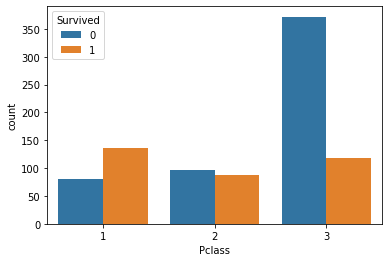

In [7]:
sns.countplot(x = 'Pclass', data = training_set, hue = 'Survived')

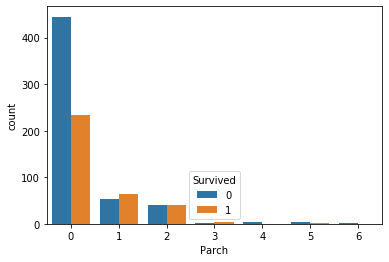

In [8]:
sns.countplot(x = 'Parch', data = training_set, hue = 'Survived')

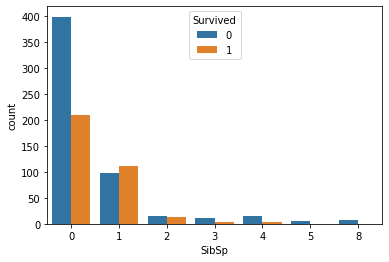

In [9]:
sns.countplot(x = 'SibSp', data = training_set, hue = 'Survived')

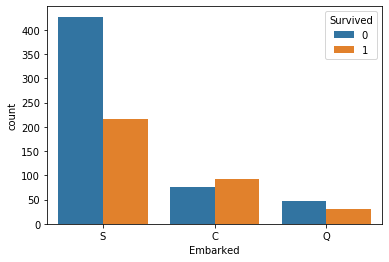

In [10]:
sns.countplot(x = 'Embarked', data = training_set, hue = 'Survived')

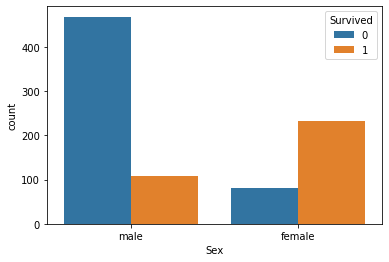

In [11]:
sns.countplot(x = 'Sex', data = training_set, hue = 'Survived')

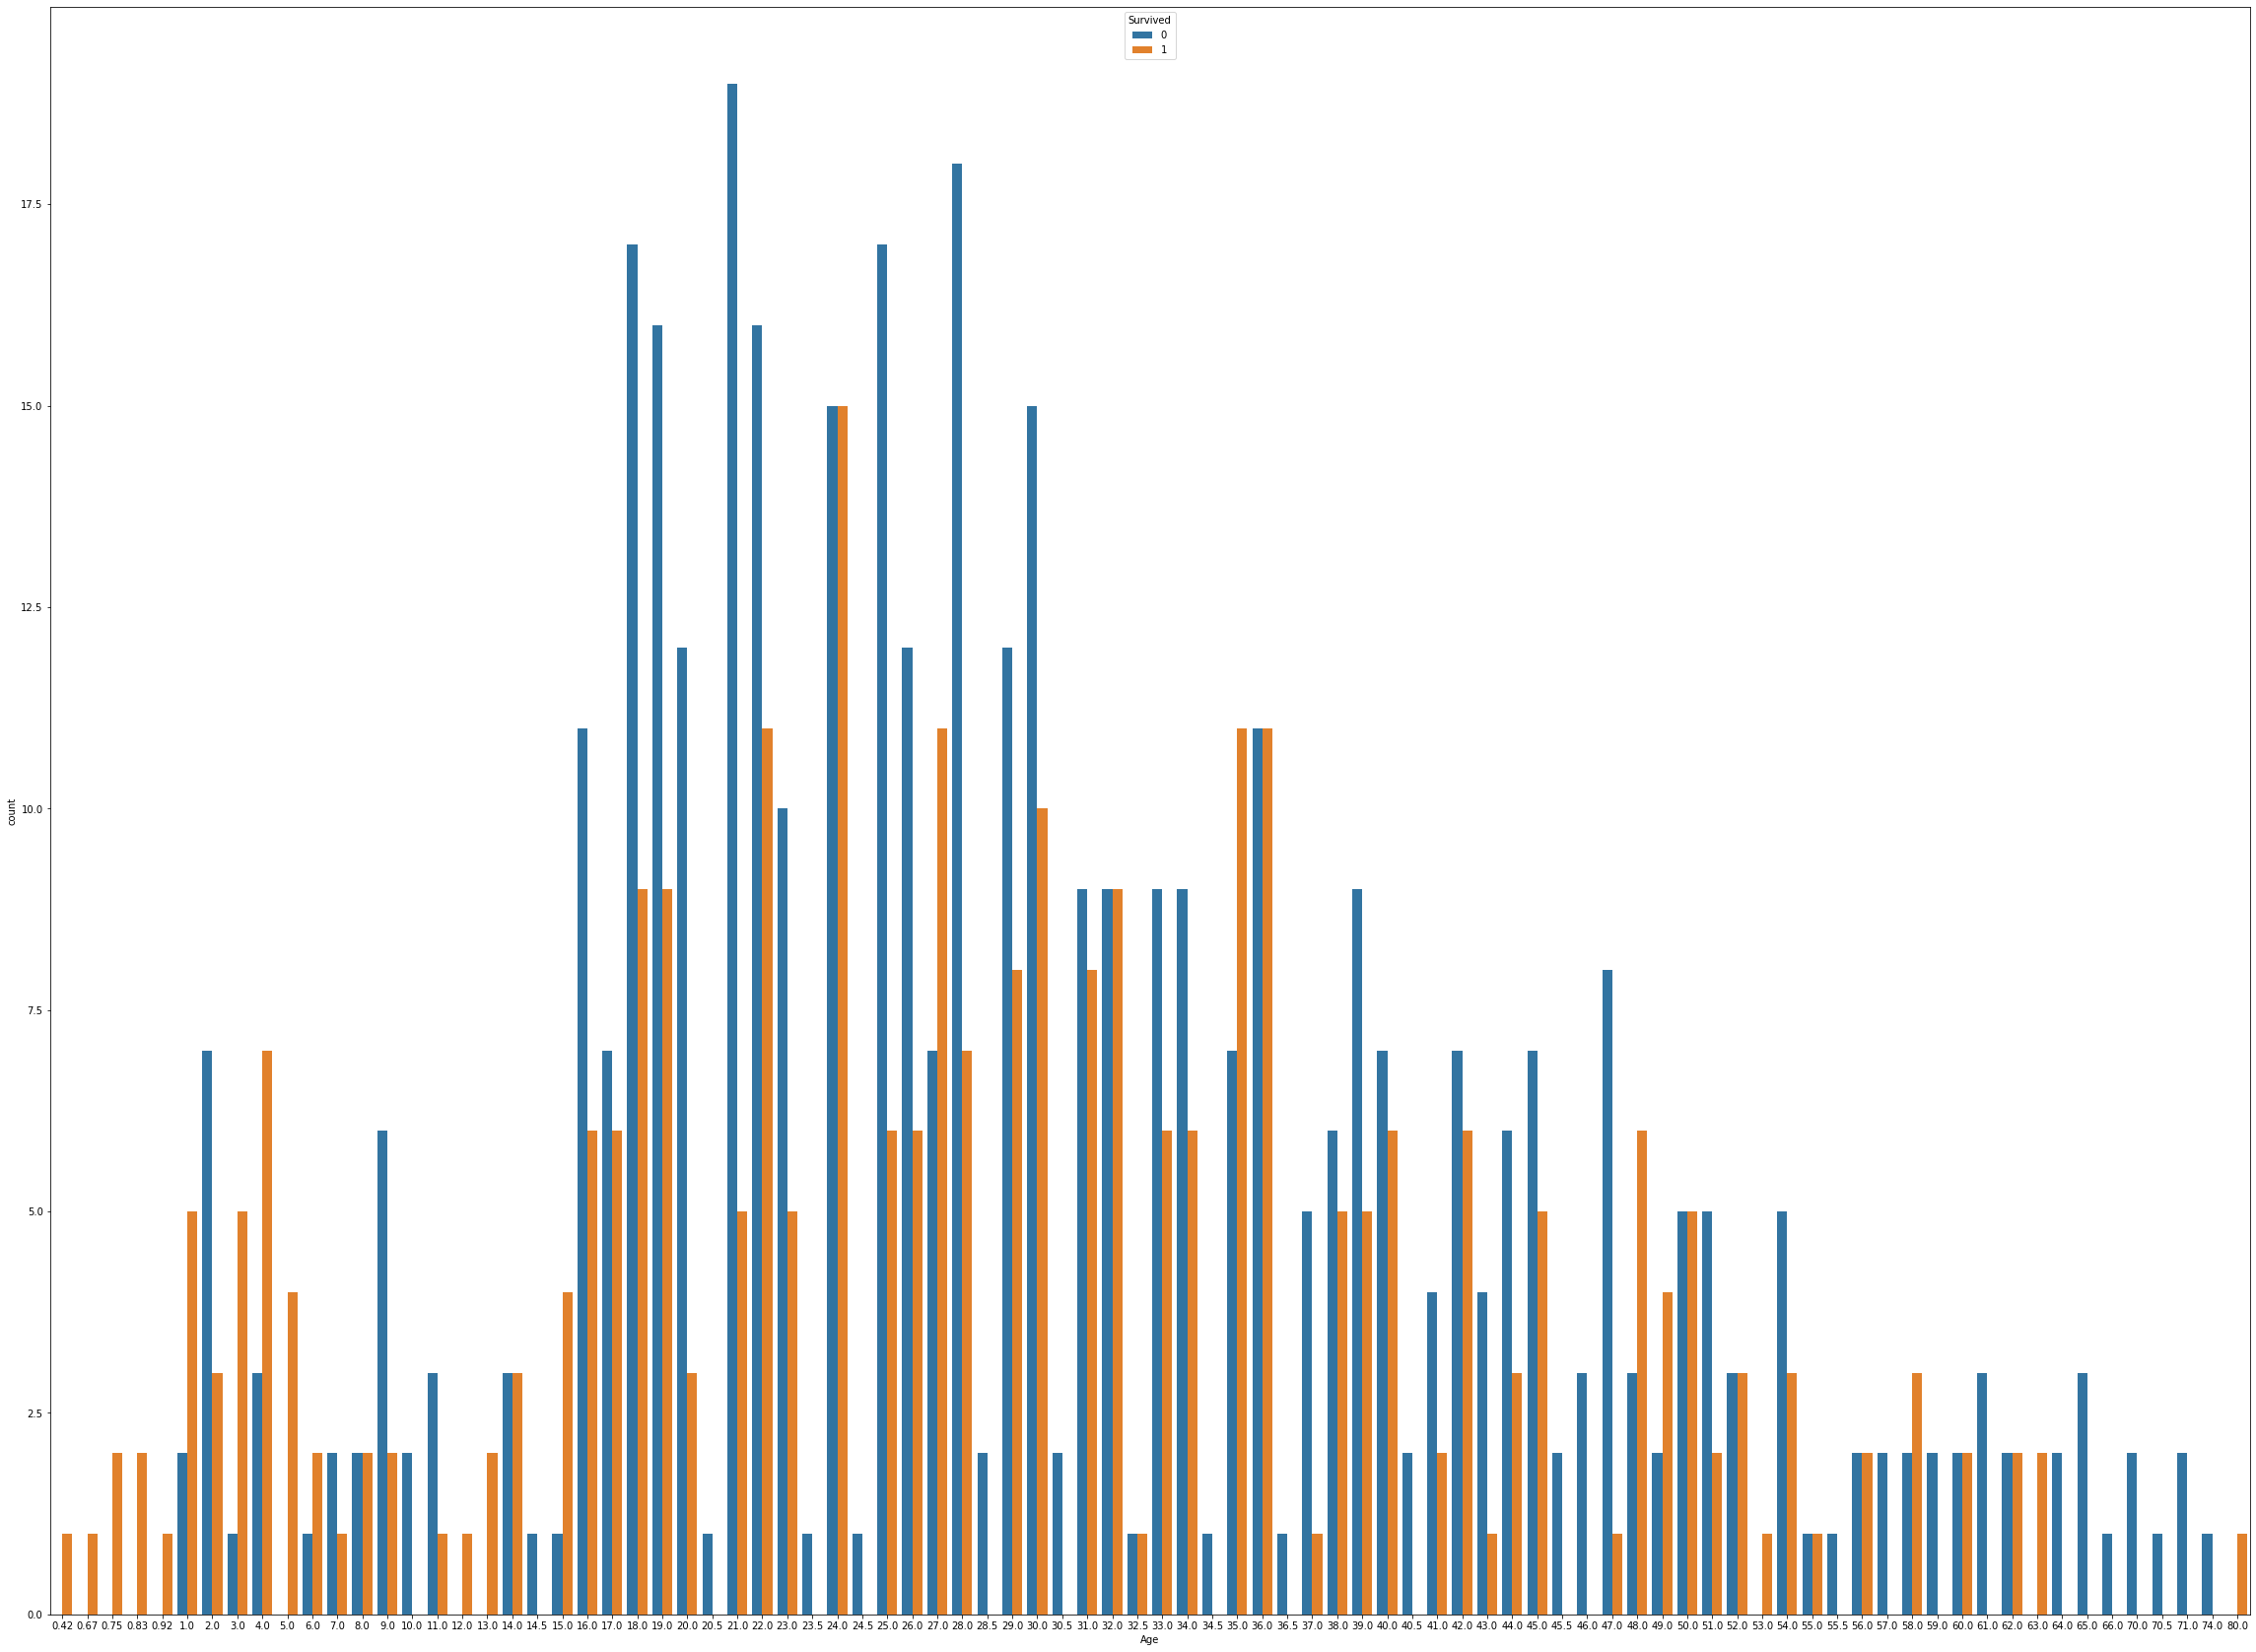

In [12]:
plt.figure(figsize = (40,30))
sns.countplot(x = 'Age', data = training_set, hue = 'Survived')

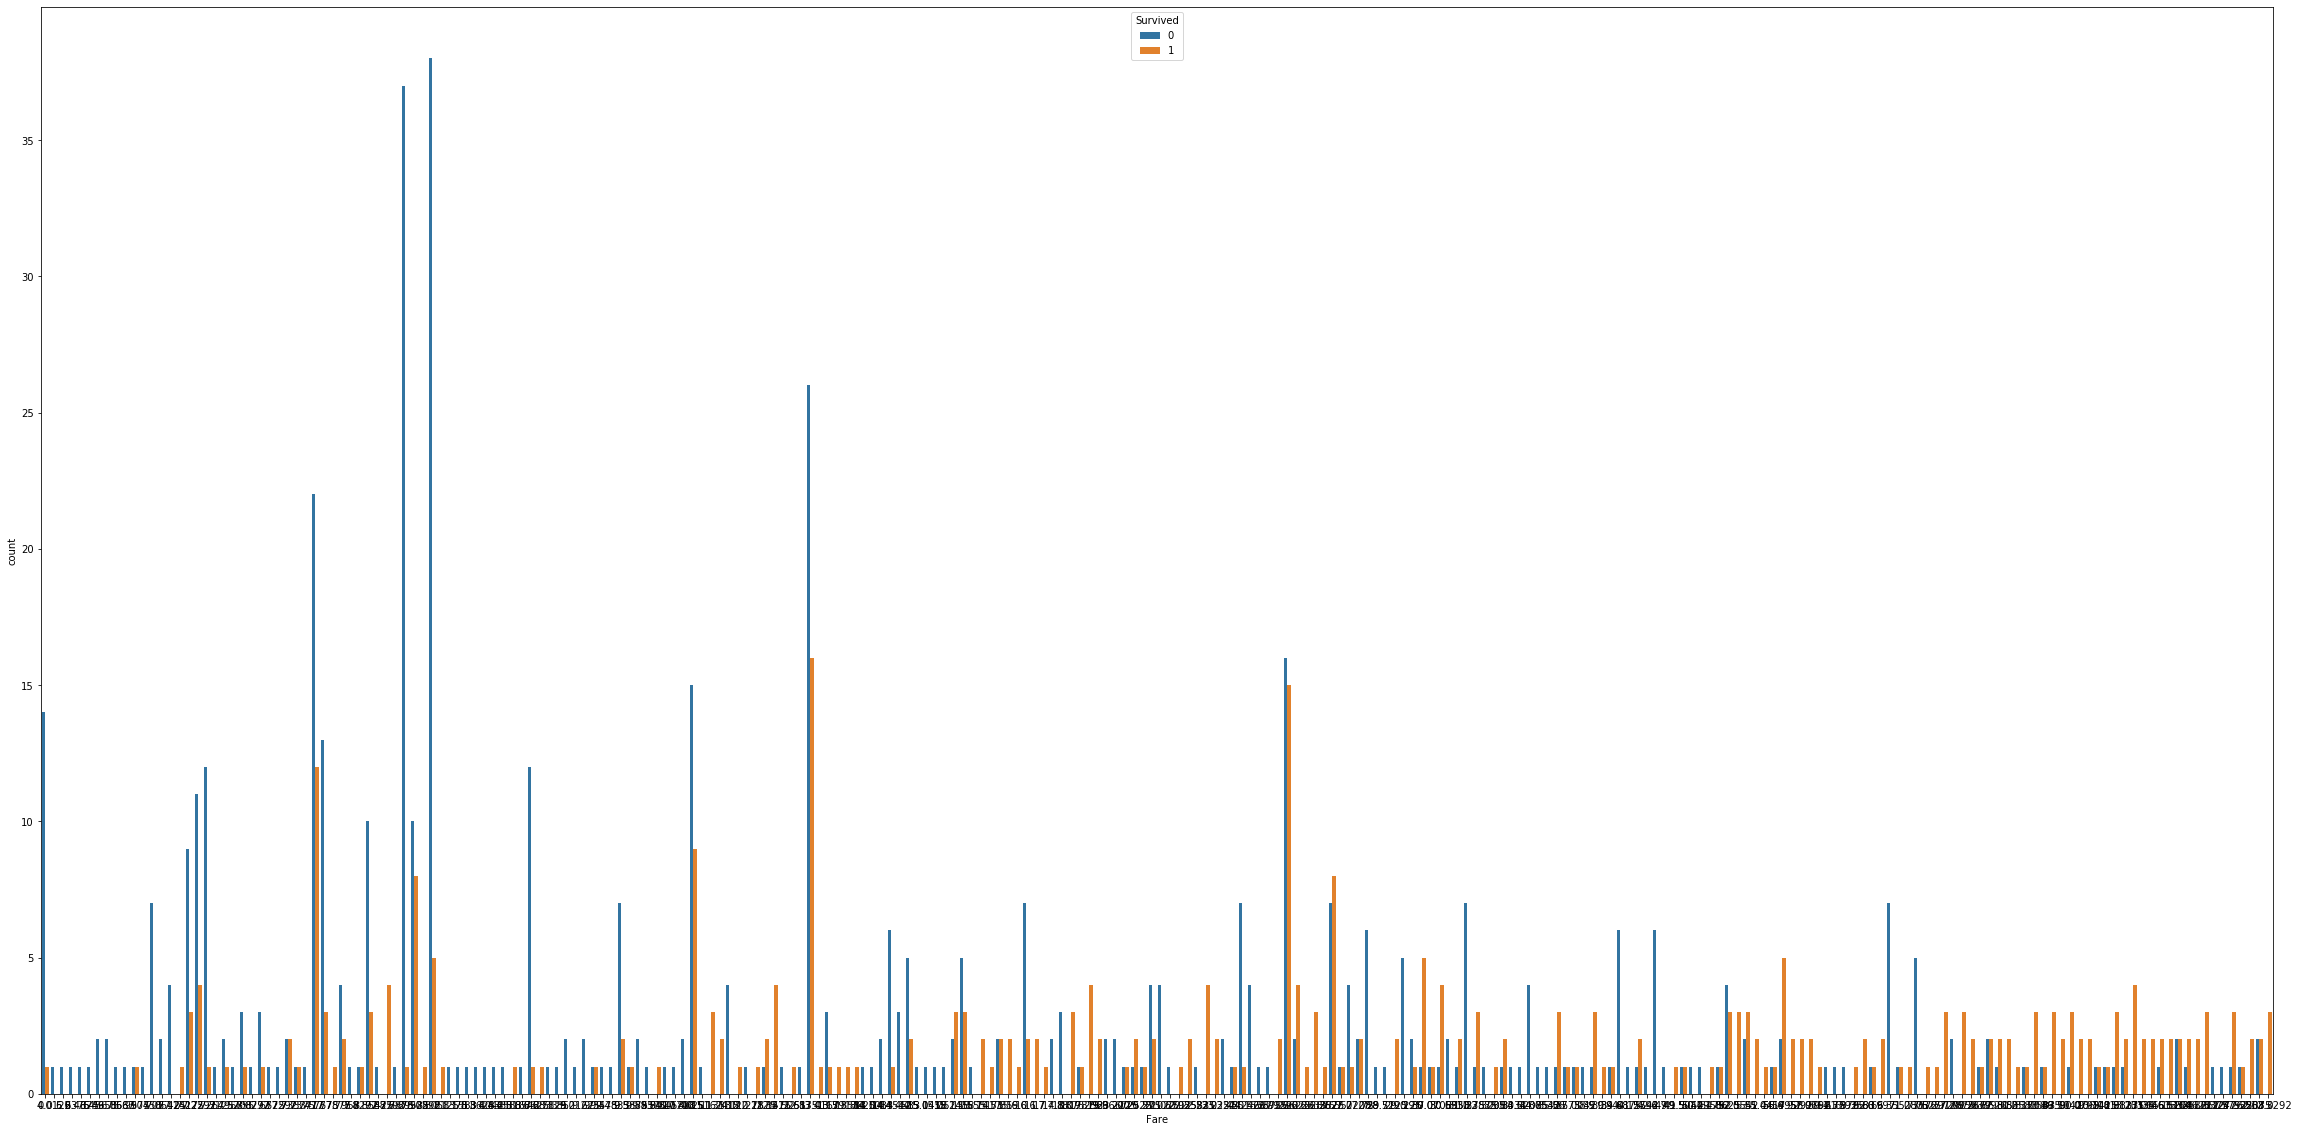

In [13]:
plt.figure(figsize = (40,20))
sns.countplot(x = 'Fare', data = training_set, hue = 'Survived')

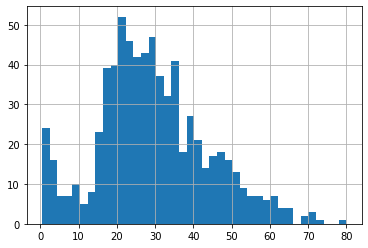

In [14]:
training_set['Age'].hist(bins = 40)

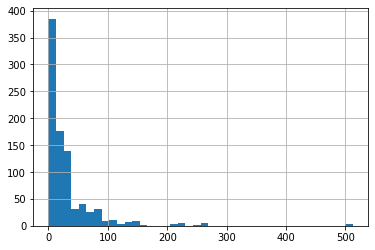

In [15]:
training_set['Fare'].hist(bins = 40)

# Step 3 - Prepare data for training/ Data Cleaning

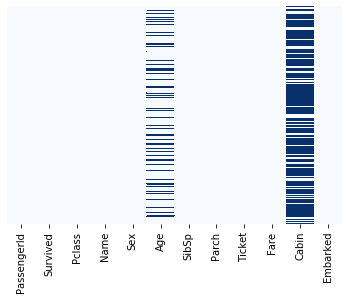

In [16]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar = False, cmap='Blues')

In [17]:
training_set.drop(['PassengerId', 'Name', 'Ticket', 'Embarked', 'Cabin'], axis = 1, inplace = True)

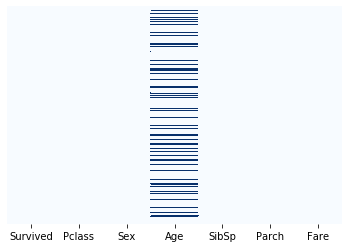

In [18]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar = False, cmap='Blues')

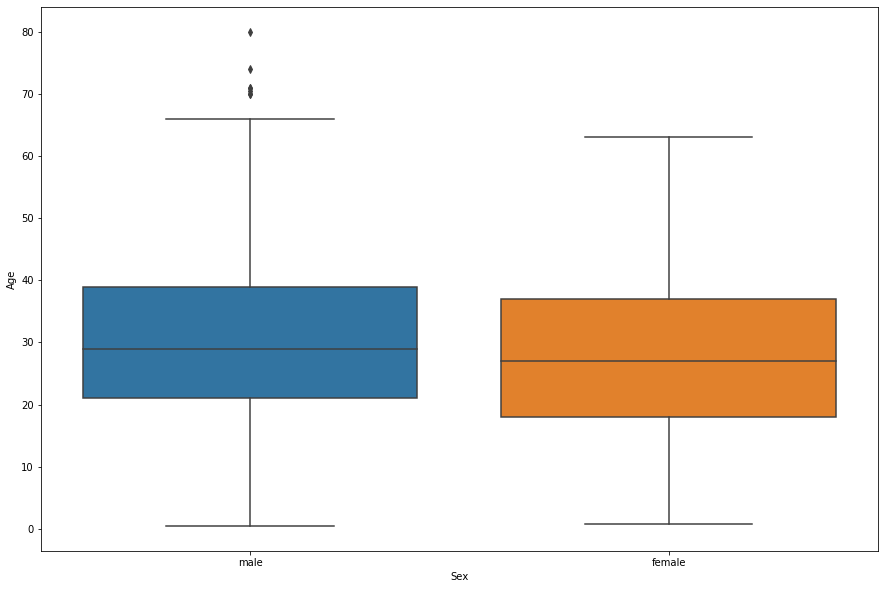

In [19]:
plt.figure(figsize = [15,10])
sns.boxplot(x = 'Sex', y = 'Age', data = training_set)

In [20]:
def fill_age(data):
    age = data[0]
    sex = data[1]
    
    if pd.isnull(age):
        if sex is 'male':
            return 29
        else:
            return 25
    else:
        return age

In [21]:
training_set['Age'] = training_set[['Age', 'Sex']].apply(fill_age, axis = 1)

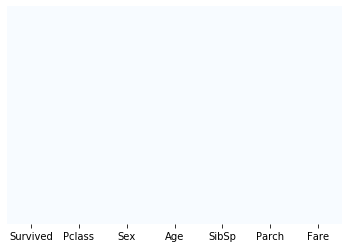

In [22]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar = False, cmap='Blues')

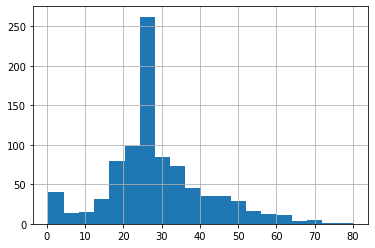

In [23]:
training_set['Age'].hist(bins = 20)

In [24]:
male = pd.get_dummies(training_set['Sex'], drop_first= True)

In [25]:
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [26]:
training_set.drop('Sex', axis = 1, inplace = True)

In [27]:
training_set = pd.concat([training_set, male], axis = 1)

In [28]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [29]:
X = training_set.drop('Survived', axis = 1).values

In [30]:
y = training_set['Survived'].values

# Step 4 - Model Training

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\17655\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Step 5 - Model Evaluation

In [33]:
y_pred1 = classifier.predict(X_validate)

In [34]:
y_pred1

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
cm = confusion_matrix(y_validate, y_pred1)

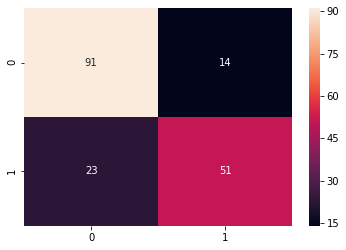

In [37]:
sns.heatmap(cm, annot = True)

In [38]:
report = classification_report(y_validate, y_pred1)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

